# Modelado de datos

In [1]:
## Configuracion Path o warnings
## Ejecutar una vez
import os
os.chdir("..")  # Retrocede un directorio

In [4]:
import pandas as pd
df = pd.read_csv(r'data\processed\InkaSeguro.csv',header='infer',sep=',')
variables_excluidas = ["VAR06","VAR07","VAR09","VAR010","VAR011"]
df = df.drop(columns=variables_excluidas)
df = df.set_index('ID')
df.head(5)

,ANIO,ID,COMPRASEG,VAR01,VAR02,VAR03,VAR04,VAR05,VAR08,VAR012,...,VAR014,VAR06_O,VAR07_O,VAR09_O,VAR010_O,VAR011_O,VAR015,VAR016,VAR017,VAR018
0,2018.0,1,0,-0.236376,-0.419902,902.0,-0.334187,-0.823758,0.297496,-0.869708,...,region_2,-0.152608,-0.425952,-0.633427,-0.049057,-0.579918,0.795871,-0.105571,-0.976366,0.672456
1,2023.0,2,0,0.078824,-0.190658,214.0,-0.949181,-1.003805,-0.760871,-0.869708,...,region_1,-0.152608,-0.451266,-0.669274,-0.053773,-0.586835,4.978460,-0.111546,-1.156413,0.674263
2,2022.0,9,0,-0.611287,-0.584548,219.0,0.280807,-0.000688,1.355862,1.335833,...,region_4,0.126298,-0.524808,0.025297,0.042908,0.082709,-0.480383,0.004216,0.132140,-20.745549
3,2014.0,12,0,-0.581431,2.476765,613.0,0.895801,1.568290,-0.760871,1.335833,...,region_2,0.126298,-0.521404,1.258130,0.040550,1.088154,0.361682,0.521889,2.980698,-0.166512
4,2015.0,14,0,-0.650931,-0.308825,513.0,3.355777,1.568290,0.297496,1.335833,...,region_2,0.040331,-0.218178,-0.191639,0.061773,-0.361337,-10.866286,-0.031940,1.608621,1.138486


In [13]:
variables_numericas = ['VAR01', 'VAR02', 'VAR03', 'VAR04', 'VAR05',
       'VAR08', 'VAR012', 'VAR013', 'VAR06_O', 'VAR07_O', 'VAR09_O',
       'VAR010_O', 'VAR011_O', 'VAR015', 'VAR016', 'VAR017', 'VAR018']

matriz_correlacion = df[variables_numericas].corr()
matriz_correlacion = round(matriz_correlacion, 3)



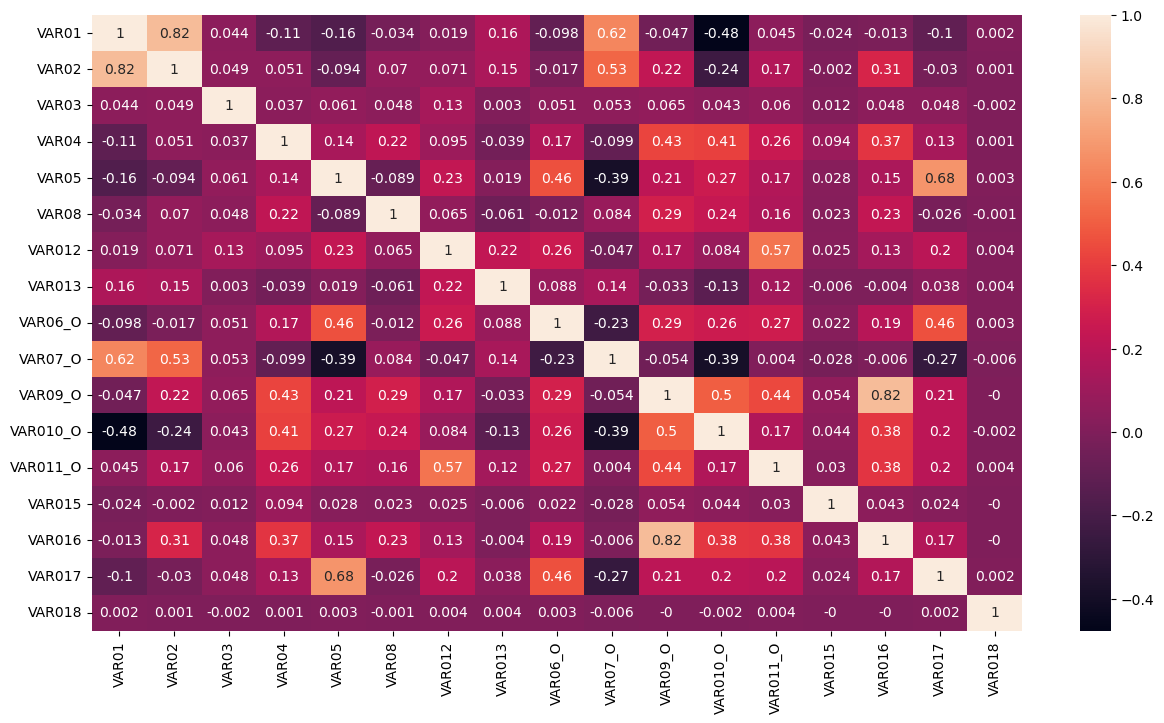

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
# Crear una figura con un tamaño mayor
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar la matriz de correlación como un mapa de calor
sns.heatmap(matriz_correlacion, ax=ax, annot=True)

# Mostrar el gráfico
plt.show()

In [17]:
df_features = df.drop('VAR014', axis=1)
df_features.head()

,ANIO,COMPRASEG,VAR01,VAR02,VAR03,VAR04,VAR05,VAR08,VAR012,VAR013,VAR06_O,VAR07_O,VAR09_O,VAR010_O,VAR011_O,VAR015,VAR016,VAR017,VAR018
ID,,,,,,,,,,,,,,,,,,,
1,2018.0,0,-0.236376,-0.419902,902.0,-0.334187,-0.823758,0.297496,-0.869708,1.713473,-0.152608,-0.425952,-0.633427,-0.049057,-0.579918,0.795871,-0.105571,-0.976366,0.672456
2,2023.0,0,0.078824,-0.190658,214.0,-0.949181,-1.003805,-0.760871,-0.869708,0.745937,-0.152608,-0.451266,-0.669274,-0.053773,-0.586835,4.978460,-0.111546,-1.156413,0.674263
9,2022.0,0,-0.611287,-0.584548,219.0,0.280807,-0.000688,1.355862,1.335833,0.820363,0.126298,-0.524808,0.025297,0.042908,0.082709,-0.480383,0.004216,0.132140,-20.745549
12,2014.0,0,-0.581431,2.476765,613.0,0.895801,1.568290,-0.760871,1.335833,1.862324,0.126298,-0.521404,1.258130,0.040550,1.088154,0.361682,0.521889,2.980698,-0.166512
14,2015.0,0,-0.650931,-0.308825,513.0,3.355777,1.568290,0.297496,1.335833,2.457731,0.040331,-0.218178,-0.191639,0.061773,-0.361337,-10.866286,-0.031940,1.608621,1.138486


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo
modelo.fit(df_features.drop('COMPRASEG', axis=1), df_features['COMPRASEG'])

# Obtener la importancia de las variables
importancias = modelo.feature_importances_


# Crear un dataframe con las importancias
df_importancias = pd.DataFrame({'variable': df_features.drop('COMPRASEG', axis=1).columns, 'importancia': importancias})

# Ordenar las variables por importancia
df_importancias = df_importancias.sort_values('importancia', ascending=False)

# Imprimir las variables por orden de importancia
print(df_importancias)

    variable  importancia
15    VAR016     0.082971
17    VAR018     0.082854
11   VAR09_O     0.075211
10   VAR07_O     0.074769
16    VAR017     0.070727
1      VAR01     0.070638
3      VAR03     0.068296
14    VAR015     0.065297
13  VAR011_O     0.065242
2      VAR02     0.053304
9    VAR06_O     0.051868
12  VAR010_O     0.050096
8     VAR013     0.049644
4      VAR04     0.037137
5      VAR05     0.036677
0       ANIO     0.029596
7     VAR012     0.019601
6      VAR08     0.016074


<Axes: xlabel='variable'>

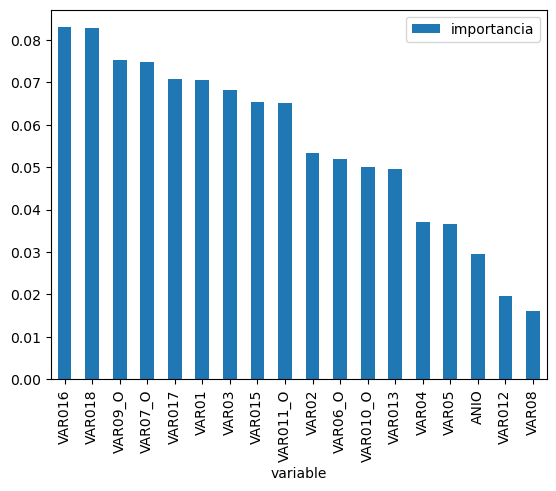

In [23]:
df_importancias.plot.bar(x='variable',y='importancia')

## Division de datos


En Python, el paquete scikit-learn contiene un gran número de funciones que podemos utilizar para construir un modelo de aprendizaje automático, incluida una función train_test_split que garantiza que obtengamos una división estadísticamente aleatoria de los datos de entrenamiento y de prueba. Utilizaremos esta función para dividir los datos en un 70% para el entrenamiento y retener un 30% para las pruebas.

In [25]:
df.columns

Index(['ANIO', 'COMPRASEG', 'VAR01', 'VAR02', 'VAR03', 'VAR04', 'VAR05',
       'VAR08', 'VAR012', 'VAR013', 'VAR014', 'VAR06_O', 'VAR07_O', 'VAR09_O',
       'VAR010_O', 'VAR011_O', 'VAR015', 'VAR016', 'VAR017', 'VAR018'],
      dtype='object')

In [47]:
features = ['VAR016','VAR018','VAR07_O','VAR017','VAR01','VAR03','VAR015','VAR011_O','VAR010_O','VAR013','VAR04','VAR014']
label = 'COMPRASEG'
X, y = df[features].values, df[label].values

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25,stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))


Training cases: 108511
Test cases: 46506


El siguiente codigo es para optimizar los hiperparametros pero demora mucho tiempo en converger las soluciones mas optimas asi que usaremos el algoritmo de la manera que viene por defecto en el modulo de `sklearn`.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Mejores parámetros:', best_params)
print('Mejor puntuación:', best_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: 10})
model.fit(X_train, y_train)


In [53]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6,7,8,9,10]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the VAR014 column)
categorical_features = [11]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Set regularization rate
reg = 0.01
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [11])])),
                ('logregressor',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                                            random_state=0))])


Confusion Matrix:
 [[46069     2]
 [  435     0]] 

Accuracy: 0.9906033630069239
Overall Precision: 0.0
Overall Recall: 0.0

AUC: 0.6698291268075237


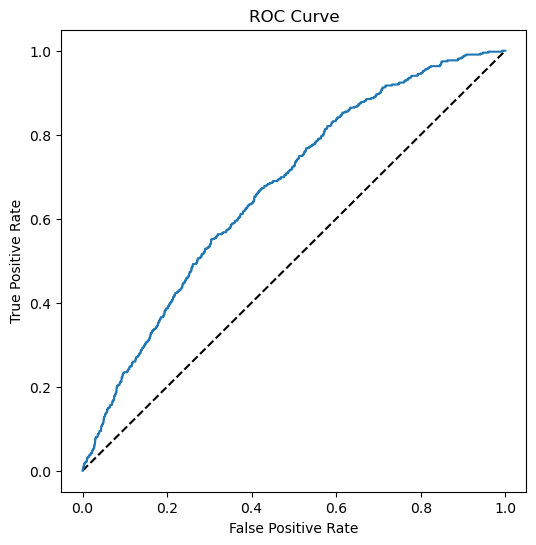

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [56]:
gini = 2*auc - 1
gini

0.3396582536150474

In [61]:
y_hat = model.predict_proba(X_test)

In [ ]:
df_test = pd.DataFrame(X_test,columns=features)
pd.concat([df_test, y_test], axis=1)